<a href="https://colab.research.google.com/github/Soumyajana0101/Play-Store-App-Review-Analysis/blob/main/Capstone_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Play Store App Review Analysis
----By Soumya Jana

In [1]:
#importing all libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#fetching data
app_store_data = pd.read_csv("/content/drive/MyDrive/Play Store Data.csv")
app_store_data.info()

#removing unnecessary columns
app_store_data.drop(["Genres","Current Ver","Android Ver","Content Rating"],axis =1 ,inplace = True)

#storing redundant data as category to save memory
app_store_data['Category'] = app_store_data['Category'].astype("category")
app_store_data['Type'] = app_store_data['Type'].astype("category")
app_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------

In [3]:
#finding the null values present columnwise
col_ = app_store_data.columns
null_values_dict = {}
for i in range(len(col_)):
  null_values_dict[col_[i]] = app_store_data[col_[i]].isna().sum()
null_values_dict

{'App': 0,
 'Category': 0,
 'Rating': 1474,
 'Reviews': 0,
 'Size': 0,
 'Installs': 0,
 'Type': 1,
 'Price': 0,
 'Last Updated': 0}

Since the number of null values for Rating column is close to 15 percent of the total values so we cannot straightaway remove the columns as it may lead to a major data discrepancy so we have tried to replace the null values corresponding to each category by the mean for the category

In [4]:

# Group by category and calculate mean for each group
mean_by_category = app_store_data.groupby('Category')['Rating'].transform('mean')

# Fill missing values with mean for each category
app_store_data['Rating'].fillna(mean_by_category, inplace=True)


#remove the rest of the null values from the dataset
app_store_data.dropna(how = 'any',inplace = True)
app_store_data = app_store_data[app_store_data.Type != '0']
app_store_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   App           10839 non-null  object  
 1   Category      10839 non-null  category
 2   Rating        10839 non-null  float64 
 3   Reviews       10839 non-null  object  
 4   Size          10839 non-null  object  
 5   Installs      10839 non-null  object  
 6   Type          10839 non-null  category
 7   Price         10839 non-null  object  
 8   Last Updated  10839 non-null  object  
dtypes: category(2), float64(1), object(6)
memory usage: 700.0+ KB


Now we have a uniform Dataframe to work with having clean data and no null values

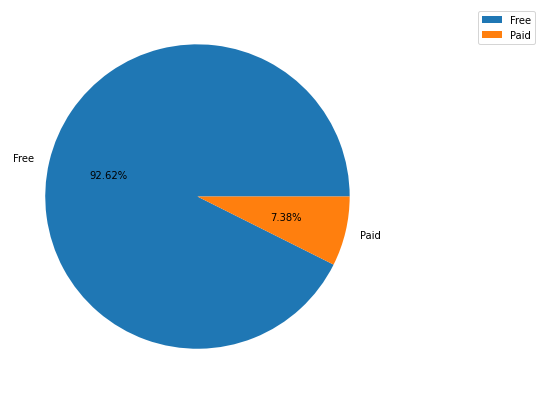

In [5]:
# labels = ["Free","Paid"]
# temp = app_store_data['Type'].value_counts().reset_index()
# plt.figure(figsize=(12,12))
# ax = plt.subplot(111)
# explode = (0.0,0.1)
# plt.style.use("ggplot")
# plt.title("Distribution based on free and paid apps")
# plt.pie(x = temp['Type'],autopct = "%.1f%%",shadow = True,startangle = 90)
# plt.legend()
# ax.legend(bbox_to_anchor=(1.4, 1))
# plt.show()

temp = app_store_data['Type'].value_counts().reset_index().drop(2)
plt.figure(figsize=(7,7))
ax = plt.subplot(111)
plt.pie(x = temp['Type'],labels = temp['index'],autopct= '%1.2f%%')
plt.legend()
ax.legend(bbox_to_anchor=(1.4, 1))
plt.show()

In [6]:


payment_type = app_store_data.groupby('Type')
free_apps_group = payment_type.get_group("Free")
paid_apps_group = payment_type.get_group("Paid")

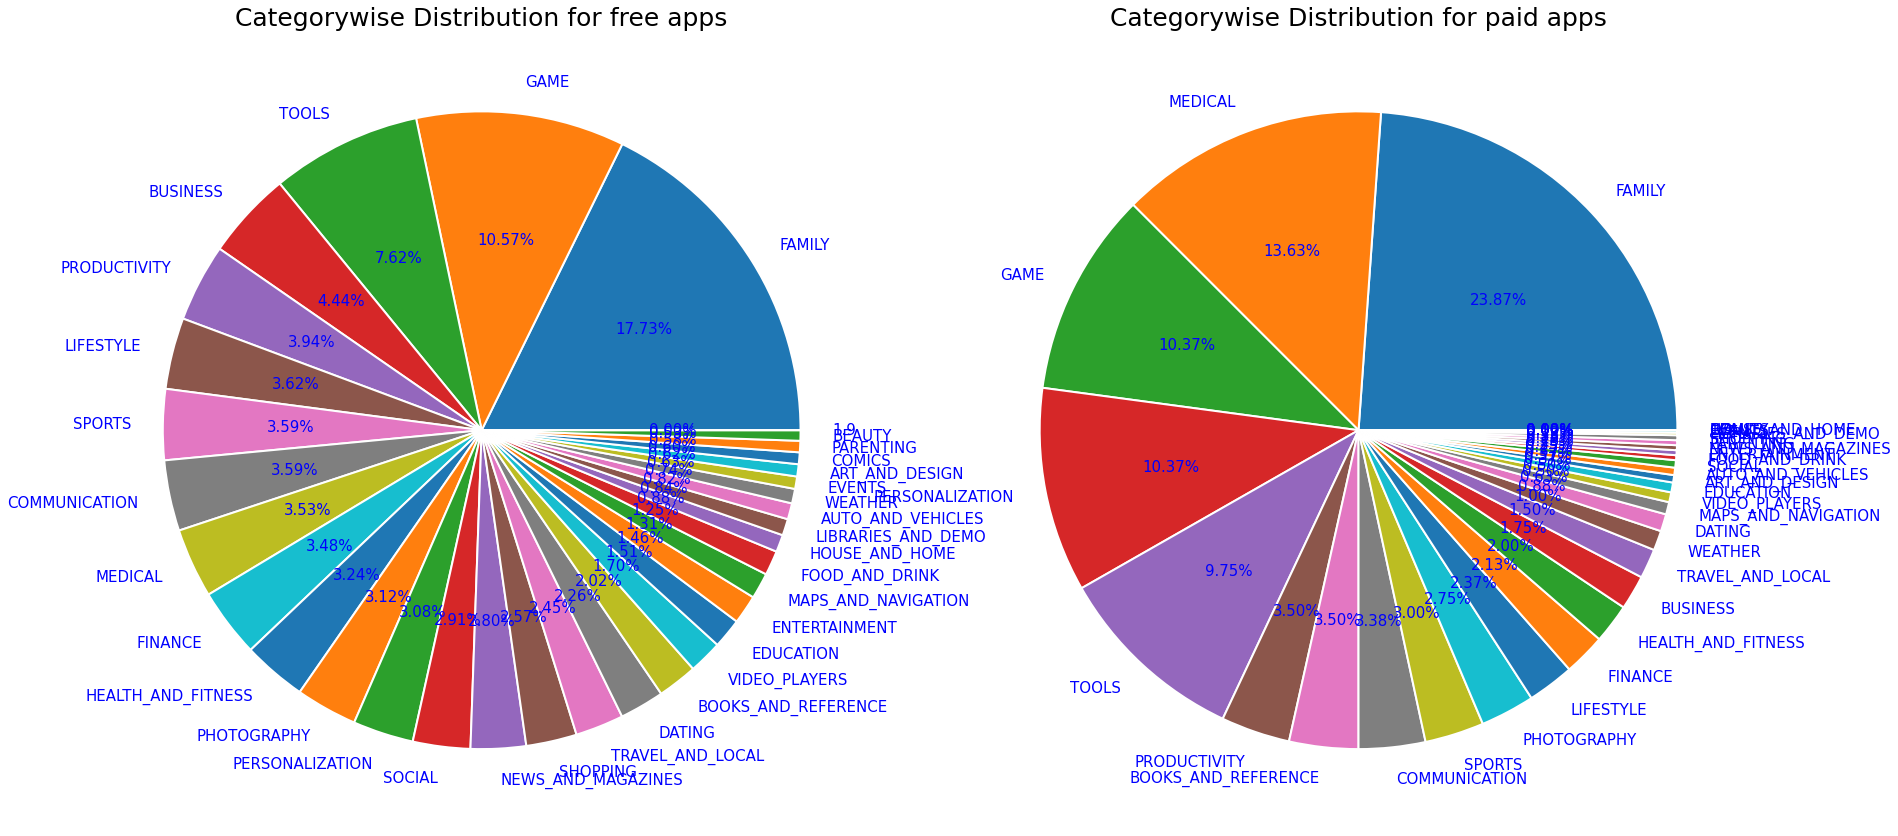

In [7]:
temp1 = free_apps_group['Category'].value_counts().reset_index()
temp2 = paid_apps_group['Category'].value_counts().reset_index()
textprops = {'fontsize':15,'color': 'b'}
wedgeprops = {'linewidth':2,'edgecolor':'white'}
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 20))
ax1.pie(x = temp1['Category'],labels = temp1['index'],autopct = '%.2f%%',textprops = textprops,wedgeprops = wedgeprops)
ax2.pie(x = temp2['Category'],labels = temp2['index'],autopct = '%.2f%%',textprops = textprops,wedgeprops = wedgeprops)
ax1.set_title('Categorywise Distribution for free apps',fontsize = 25)
ax2.set_title('Categorywise Distribution for paid apps',fontsize = 25)
plt.subplots_adjust(wspace=0.1)
plt.show()